In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_path = "../logs"
exps = os.listdir(data_path)
value_loss = {}
policy_loss = {}
entropy_loss = {}

for exp in exps:
    try:
        nested_ = os.listdir(os.path.join(data_path, exp))
        file = os.path.join(data_path, exp, nested_[0], "losses.log")
        data = pd.read_csv(file)

        # take all but last _s1, or _s2, or _s3 which are the seeds
        exp_name = "_".join(exp.split("_")[:-1])
        if exp_name not in value_loss:
            value_loss[exp_name] = []
            policy_loss[exp_name] = []
            entropy_loss[exp_name] = []
        
        value_loss[exp_name].append(data["value_loss"])
        policy_loss[exp_name].append(data["policy_loss"])
        entropy_loss[exp_name].append(data["entropy_loss"])
    except:
        print(f"Error with {exp}")
        continue

In [3]:
# make sure for each key in results, all the lists of rewards in the key are of the same length (which should be the max length common to all)
value_loss_min_lens = {}
for key in value_loss:
    min_len = min([len(x) for x in value_loss[key]])
    value_loss[key] = [x[:min_len] for x in value_loss[key]]
    value_loss_min_lens[key] = min_len
    print(f"Key {key} has {len(value_loss[key])} runs of length {min_len}")

policy_loss_min_lens = {}
for key in policy_loss:
    min_len = min([len(x) for x in policy_loss[key]])
    policy_loss[key] = [x[:min_len] for x in policy_loss[key]]
    policy_loss_min_lens[key] = min_len
    print(f"Key {key} has {len(policy_loss[key])} runs of length {min_len}")

entropy_loss_min_lens = {}
for key in entropy_loss:
    min_len = min([len(x) for x in entropy_loss[key]])
    entropy_loss[key] = [x[:min_len] for x in entropy_loss[key]]
    entropy_loss_min_lens[key] = min_len

Key PPO_SuperMarioBros-1-1-v3_pseudocounts_obsRMS:False_rewNorm:rms_updateProp:1.0_rff:False has 3 runs of length 2603
Key PPO_SuperMarioBros-1-1-v3_revd_obsRMS:False_rewNorm:rms_updateProp:1.0_rff:False has 3 runs of length 4254
Key PPO_SuperMarioBros-1-1-v3_rnd_obsRMS:False_rewNorm:rms_updateProp:1.0_rff:False has 3 runs of length 4225
Key PPO_SuperMarioBros-1-1-v3_disagreement_obsRMS:False_rewNorm:rms_updateProp:1.0_rff:False has 3 runs of length 4391
Key PPO_SuperMarioBros-1-1-v3_e3b_obsRMS:False_rewNorm:rms_updateProp:1.0_rff:False has 3 runs of length 3360
Key PPO_SuperMarioBros-1-1-v3_re3_obsRMS:False_rewNorm:rms_updateProp:1.0_rff:False has 3 runs of length 3879
Key PPO_SuperMarioBros-1-1-v3_extrinsic_obsRMS:False_rewNorm:rms_updateProp:1.0_rff:False has 3 runs of length 3157
Key PPO_SuperMarioBros-1-1-v3_rise_obsRMS:False_rewNorm:rms_updateProp:1.0_rff:False has 3 runs of length 3820
Key PPO_SuperMarioBros-1-1-v3_icm_obsRMS:False_rewNorm:rms_updateProp:1.0_rff:False has 3 runs

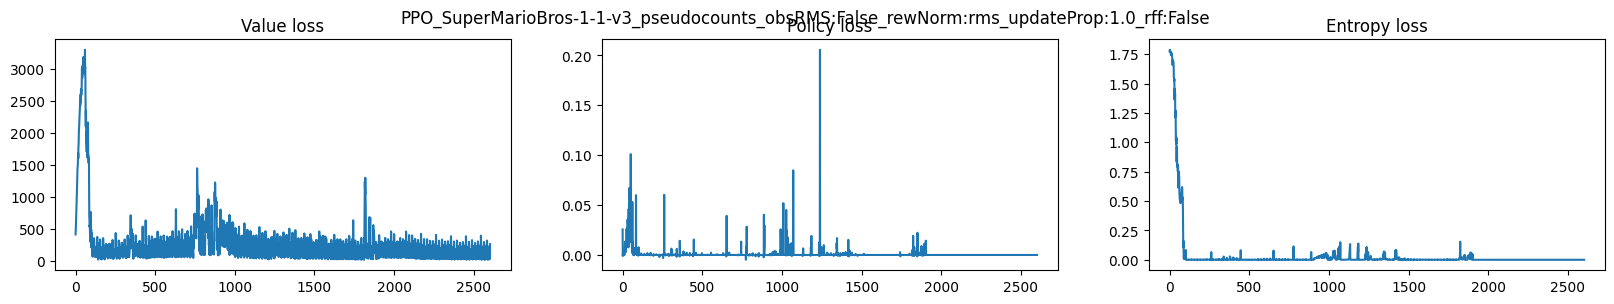

<Figure size 640x480 with 0 Axes>

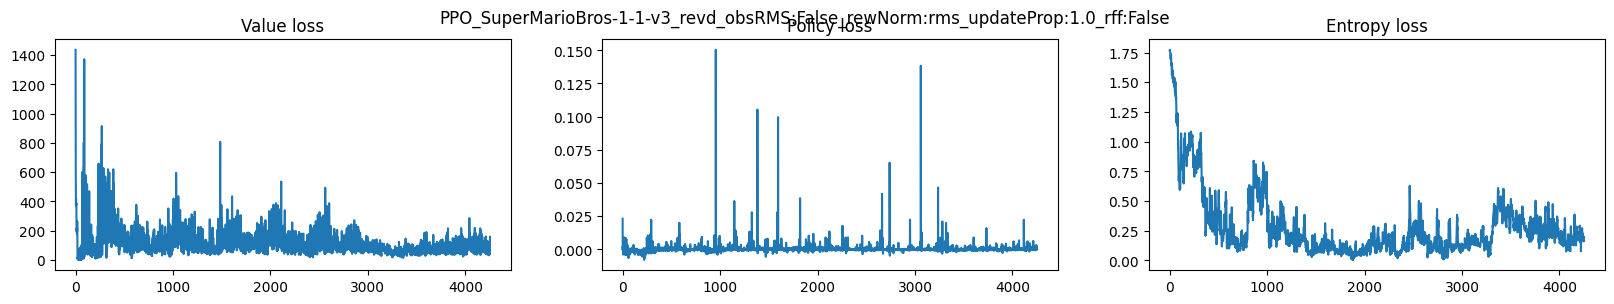

<Figure size 640x480 with 0 Axes>

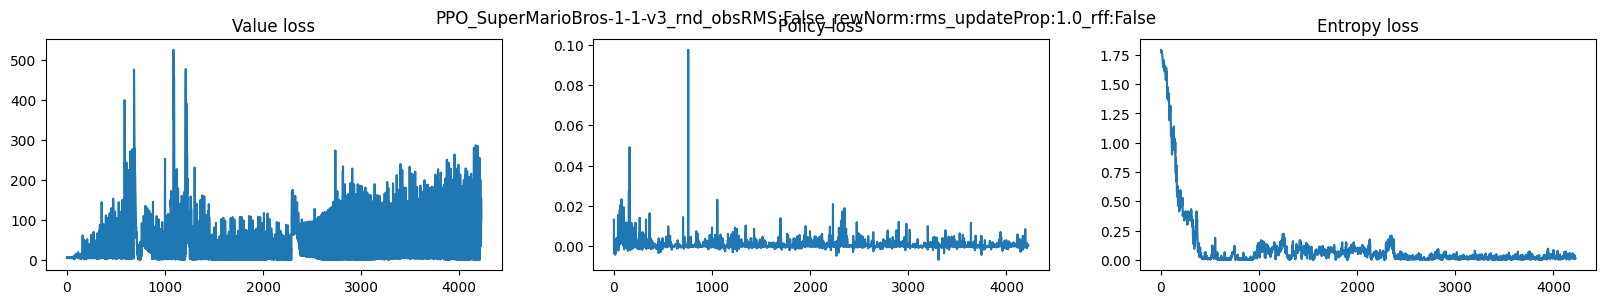

<Figure size 640x480 with 0 Axes>

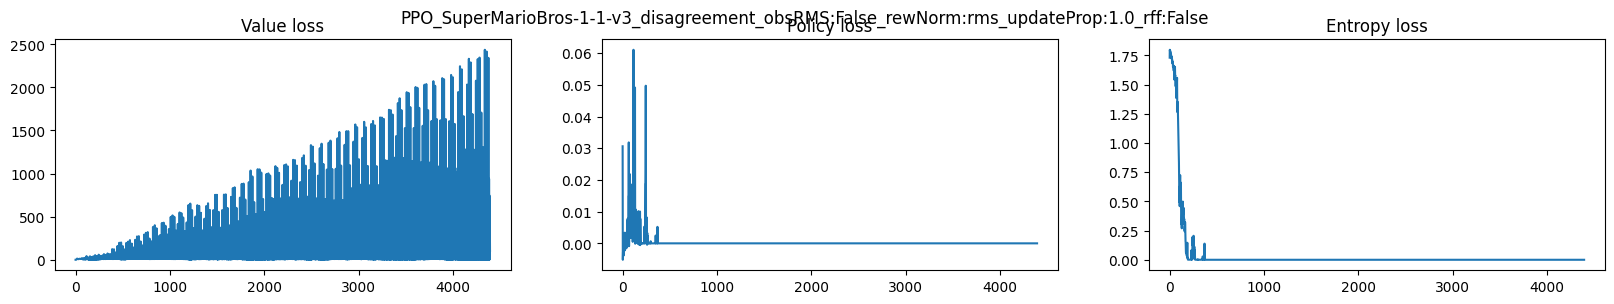

<Figure size 640x480 with 0 Axes>

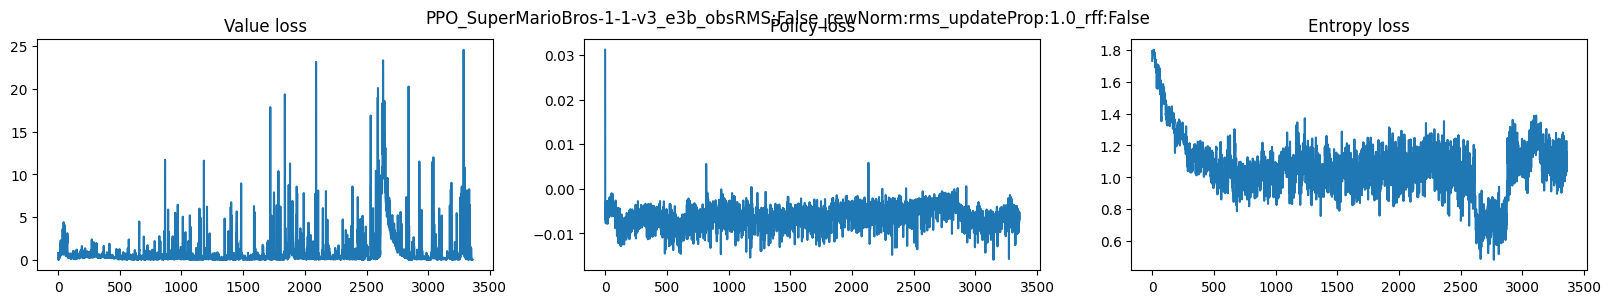

<Figure size 640x480 with 0 Axes>

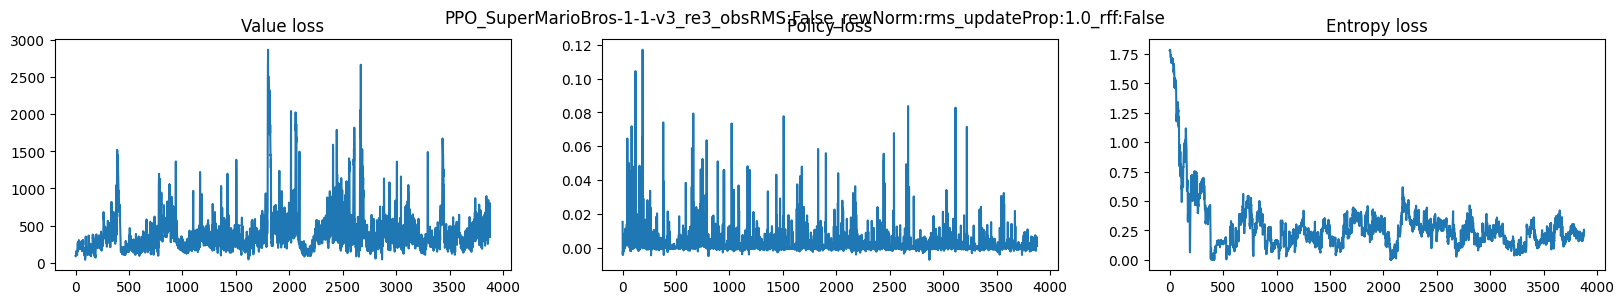

<Figure size 640x480 with 0 Axes>

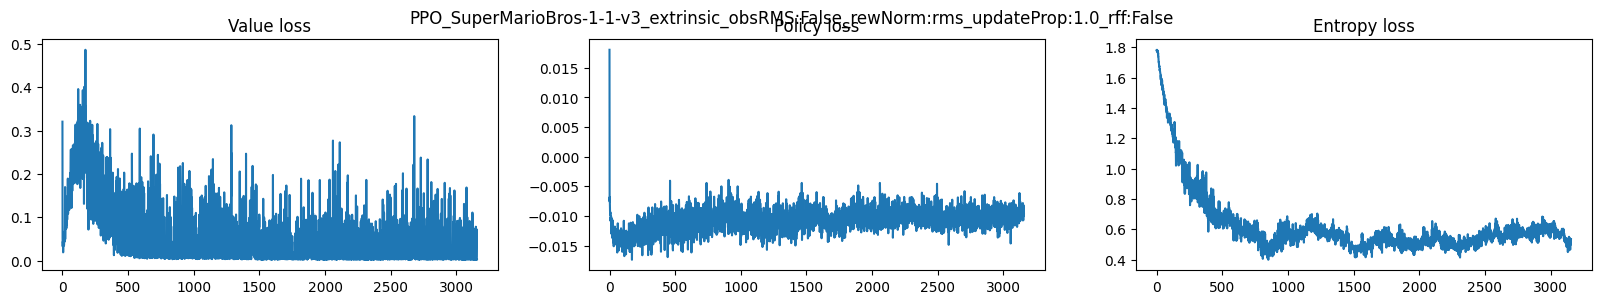

<Figure size 640x480 with 0 Axes>

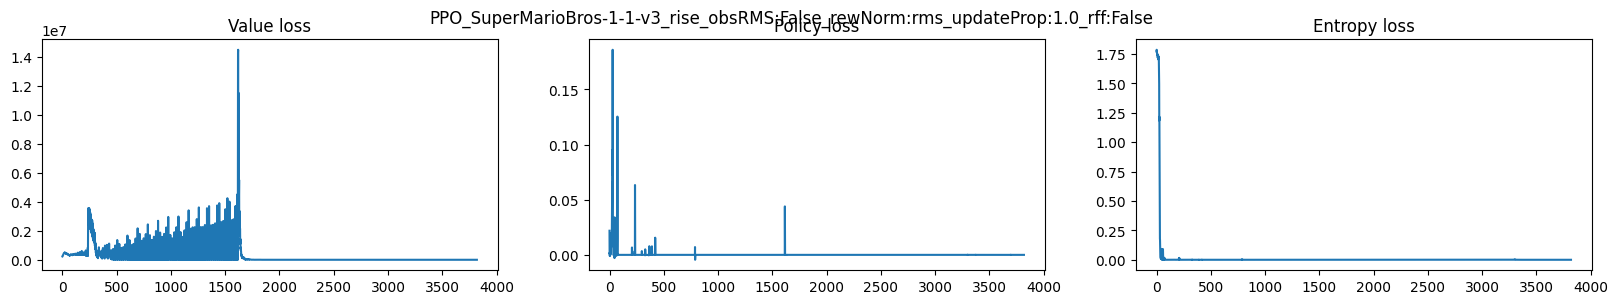

<Figure size 640x480 with 0 Axes>

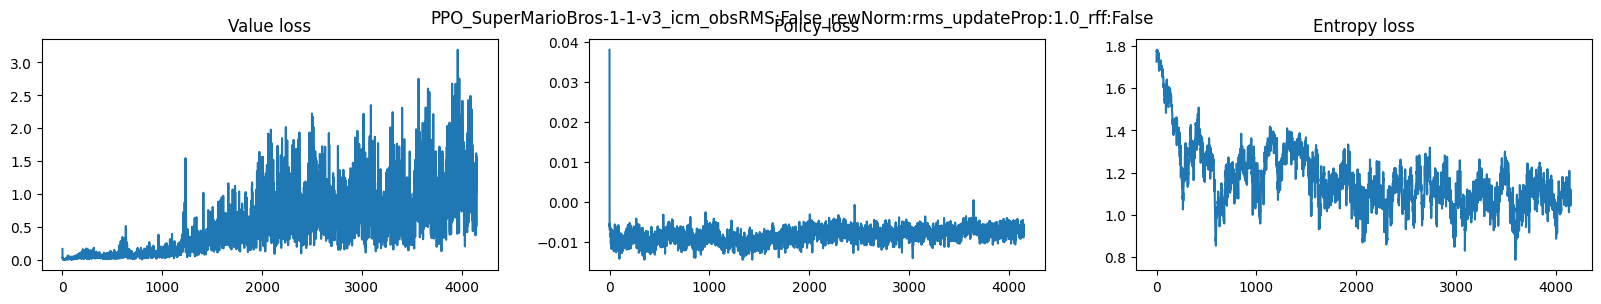

<Figure size 640x480 with 0 Axes>

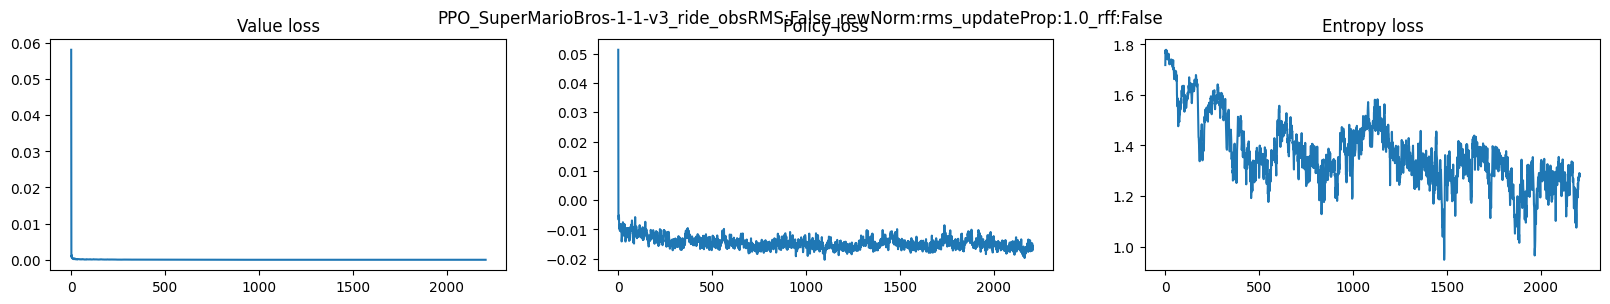

<Figure size 640x480 with 0 Axes>

In [4]:
# for each experiment, plot the 3 curves
for exp in value_loss:
    value_loss[exp] = np.array(value_loss[exp]).mean(axis=0)
    policy_loss[exp] = np.array(policy_loss[exp]).mean(axis=0)
    entropy_loss[exp] = np.array(entropy_loss[exp]).mean(axis=0)

    fig, ax = plt.subplots(1, 3, figsize=(20, 3))
    ax[0].plot(value_loss[exp])
    ax[1].plot(policy_loss[exp])
    ax[2].plot(entropy_loss[exp])
    ax[0].set_title("Value loss")
    ax[1].set_title("Policy loss")
    ax[2].set_title("Entropy loss")
    plt.suptitle(exp)
    plt.show()
    plt.tight_layout()